<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Customer_Churn_Prediction_Using_Ensemble_Techniques_in_One_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction using Ensemble Techniques Project in One Shot**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churns.csv to Telco-Customer-Churns.csv


In [ ]:
# Load the dataset
data = pd.read_csv('Telco-Customer-Churns.csv')

# Display the first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2: Data Preprocessing**

Since churn datasets often have categorical columns, encode these as numbers.

In [ ]:
# Convert categorical columns to numerical values
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Define features (X) and target variable (y)
X = data.drop('Churn', axis=1)  # Adjust if 'Churn' is named differently
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 3: Ensemble Models**

1. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7970191625266146


**2. Bagging Classifier**

In [ ]:
# Bagging Classifier with updated 'estimator' parameter
bagging = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))



Bagging Classifier Accuracy: 0.7352732434350603


**3. AdaBoost**

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8062455642299503


**4. Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.808374733853797


**5. Voting Classifier**

Combine all classifiers in a voting ensemble.

In [ ]:
voting = VotingClassifier(estimators=[
    ('rf', rf), ('bagging', bagging), ('ada', ada), ('gb', gb)], voting='hard')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7927608232789212


**Visualization**

**Step 1: Churn Distribution Plot**

Churn- Manthan

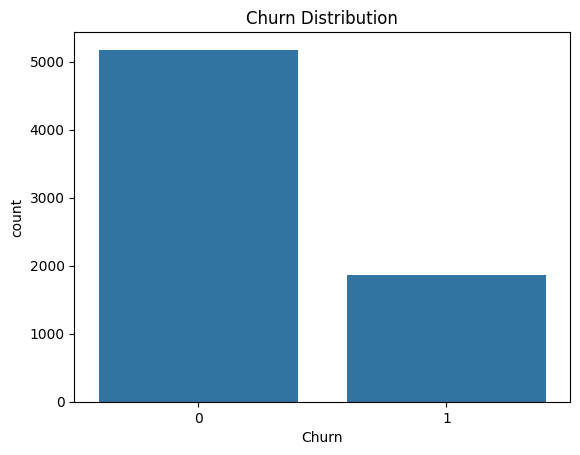

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


**Step 2: Pair Plot**

A pair plot provides a grid of scatter plots for each pair of numerical features, colored by the churn outcome.

In [ ]:
# Pair plot to visualize relationships between features and Churn
sns.pairplot(data, hue='Churn', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Features by Churn", y=1.02)
plt.show()


**Step 3: Correlation Heatmap**

The heatmap helps identify correlations between features and with the target variable.

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 4: Box Plot of Features by Churn**

Box plots show the distribution of features with respect to churn, which is useful to detect if a particular feature has different distributions for churned vs. non-churned customers.

In [ ]:
# Select numerical features only
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Box plot of numerical features by Churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
    plt.tight_layout()
plt.show()
